In [33]:
import time

import pandas as pd
from matplotlib import pyplot as plt
from PyARMViz import *

In [34]:
df = pd.read_csv('data/BreadBasket_DMS.csv')

transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

total_transactions = len(transactions)

In [35]:
times = {}

min_sup = 0.001

apriori

In [36]:
from apriori_python import apriori

start = time.time()
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.6)
times['apriori'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")
rules_pyarmviz = []

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )



Ассоциативные правила (достоверность ≥ 60%):
0: {'Hot chocolate', 'Cake'} -> {'Coffee'} Support = 0.007 Confidence = 0.602 Lift = 1.267
1: {'Cookies', 'Juice'} -> {'Coffee'} Support = 0.004 Confidence = 0.603 Lift = 1.270
2: {'Bakewell'} -> {'Coffee'} Support = 0.003 Confidence = 0.604 Lift = 1.272
3: {'Granola'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
4: {'Hot chocolate', 'Scone'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
5: {'Cookies', 'Pastry'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
6: {'Brownie', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.609 Lift = 1.281
7: {'Alfajores', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.611 Lift = 1.286
8: {'Medialuna', 'Toast'} -> {'Coffee'} Support = 0.001 Confidence = 0.611 Lift = 1.286
9: {'Hot chocolate', 'Cookies'} -> {'Coffee'} Support = 0.004 Confidence = 0.614 Lift = 1.292
10: {'Muffin', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.619 Lift = 1.303
11: 

In [37]:
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

In [38]:
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")
rules_pyarmviz = []

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )



Ассоциативные правила (достоверность ≥ 80%):
0: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
1: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
2: {'Vegan mincepie', 'Cake'} -> {'Coffee'} Support = 0.001 Confidence = 0.833 Lift = 1.754
3: {'NONE', 'Scone'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
4: {'Salad', 'Sandwich'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
5: {'Hearty & Seasonal', 'Sandwich'} -> {'Coffee'} Support = 0.001 Confidence = 0.857 Lift = 1.804
6: {'Pastry', 'Toast'} -> {'Coffee'} Support = 0.001 Confidence = 0.867 Lift = 1.824
7: {'Extra Salami or Feta', 'Salad'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
8: {'Hot chocolate', 'NONE', 'Medialuna'} -> {'Coffee'} Support = 0.001 Confidence = 0.909 Lift = 1.914
9: {'Tartine', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943


In [39]:
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

efficient_apriori

In [40]:
from efficient_apriori import apriori

start = time.time()
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.6)
times['efficient-apriori'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")

rules_pyarmviz = []

for i, r in enumerate(rules):
    ant = frozenset(r.lhs)
    cons = frozenset(r.rhs)
    union = ant | cons

    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(r.lhs)} -> {set(r.rhs)} "
          f"Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")

    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(r.lhs),
            rhs=tuple(r.rhs),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )



Ассоциативные правила (достоверность ≥ 60%):
0: {'Art Tray'} -> {'Coffee'} Support = 0.003 Confidence = 0.684 Lift = 1.440
1: {'Bakewell'} -> {'Coffee'} Support = 0.003 Confidence = 0.604 Lift = 1.272
2: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
3: {'Granola'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
4: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
5: {'Salad'} -> {'Coffee'} Support = 0.007 Confidence = 0.626 Lift = 1.318
6: {'Tartine'} -> {'Coffee'} Support = 0.003 Confidence = 0.630 Lift = 1.327
7: {'Toast'} -> {'Coffee'} Support = 0.024 Confidence = 0.704 Lift = 1.483
8: {'Cookies', 'Alfajores'} -> {'Coffee'} Support = 0.002 Confidence = 0.652 Lift = 1.373
9: {'Alfajores', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.611 Lift = 1.286
10: {'Brownie', 'Cookies'} -> {'Coffee'} Support = 0.002 Confidence = 0.625 Lift = 1.316
11: {'Brownie', 'NONE'} -> {'Coffee'} Support = 0.00

In [41]:
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

In [42]:
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")

rules_pyarmviz = []

for i, r in enumerate(rules):
    ant = frozenset(r.lhs)
    cons = frozenset(r.rhs)
    union = ant | cons

    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(r.lhs)} -> {set(r.rhs)} "
          f"Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")


    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(r.lhs),
            rhs=tuple(r.rhs),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )



Ассоциативные правила (достоверность ≥ 80%):
0: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
1: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
2: {'Vegan mincepie', 'Cake'} -> {'Coffee'} Support = 0.001 Confidence = 0.833 Lift = 1.754
3: {'Extra Salami or Feta', 'Salad'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
4: {'Hearty & Seasonal', 'Sandwich'} -> {'Coffee'} Support = 0.001 Confidence = 0.857 Lift = 1.804
5: {'NONE', 'Scone'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
6: {'Tartine', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943
7: {'Pastry', 'Toast'} -> {'Coffee'} Support = 0.001 Confidence = 0.867 Lift = 1.824
8: {'Salad', 'Sandwich'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
9: {'Hot chocolate', 'NONE', 'Medialuna'} -> {'Coffee'} Support = 0.001 Confidence = 0.909 Lift = 1.914


In [43]:
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

fpgrowth_py

In [ ]:
from fpgrowth_py import fpgrowth

start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.6)
times['fpgrowth-py'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")

rules_pyarmviz_fp = [] # для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    rules_pyarmviz_fp.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )

In [29]:
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

In [30]:
from fpgrowth_py import fpgrowth
import PyARMViz  # pip install pyarmviz

freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")

rules_pyarmviz_fp = []

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    rules_pyarmviz_fp.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )


Ассоциативные правила (достоверность ≥ 80%):
0: {'Mighty Protein'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
1: {'Art Tray', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
2: {'Extra Salami or Feta', 'Salad'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
3: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
4: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
5: {'Tartine', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943
6: {'Vegan mincepie', 'Cake'} -> {'Coffee'} Support = 0.001 Confidence = 0.833 Lift = 1.754
7: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
8: {'Salad', 'Sandwich'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
9: {'Hearty & Seasonal', 'Sandwich'} -> {'Coffee'} Support = 0.001 Confidence = 0.857 Lift = 1.804
10: {'Pastry', 'Toast'} -> {'Coffee'} Support = 0.001 Co

In [31]:
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

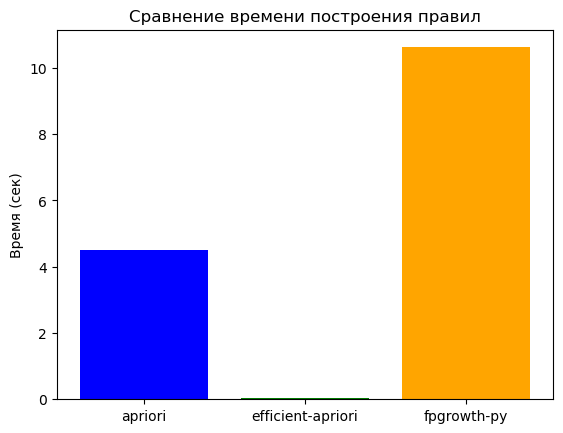

In [32]:
plt.bar(times.keys(), times.values(), color=['blue','green','orange'])
plt.ylabel("Время (сек)")
plt.title("Сравнение времени построения правил")
plt.show()